In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [7]:
def gen_series(series, path, rms_window = 8, threshold_val = 0.2):
    #Resultant
    resultant = []
    for i, r in series.iterrows():
        resultant.append(np.sqrt(r[1]**2 + r[2]**2 + r[3]**2))
    
    plt.plot(series["Relative Time"], resultant)
    plt.savefig("seq_charts_2s/"+path+"resultant.png")
    plt.clf()

    #Derivative
    derivative = []
    for i in range(1, len(resultant)):
        derivative.append((resultant[i] - resultant[i-1])/0.0125)

    plt.plot(series["Relative Time"][1:], derivative)
    plt.savefig("seq_charts_2s/"+path+"derivative.png")
    plt.clf()

    #Absolute Value
    abs_derivative = [abs(i) for i in derivative]

    plt.plot(series["Relative Time"][1:], abs_derivative)
    plt.savefig("seq_charts_2s/"+path+"abs_derivative.png")
    plt.clf()

    #RMS
    rms = ((((pd.DataFrame(np.array(abs_derivative))**2).rolling(rms_window).mean()) **0.5)[0].to_numpy().tolist()[rms_window-1:])

    plt.plot(series["Relative Time"][rms_window:], rms)
    plt.savefig("seq_charts_2s/"+path+"rms.png")
    plt.clf()

    #Normalize
    max_v = max(rms)
    min_v = min(rms)
    max_normalize = [(i - min_v)/(max_v-min_v) for i in rms]

    plt.plot(series["Relative Time"][rms_window:], max_normalize)
    plt.savefig("seq_charts_2s/"+path+"normalize.png")
    plt.clf()

    #Threshold
    threshold = [1 if i > threshold_val else 0 for i in max_normalize]
    plt.plot(series["Relative Time"][8:], threshold)
    plt.savefig("seq_charts_2s/"+path+"threshold.png")
    plt.clf()

    #Normalize (no RMS)
    max_v_nrms = max(abs_derivative)
    min_v_nrms = min(abs_derivative)
    max_normalize_nrms = [(i - min_v_nrms)/(max_v_nrms-min_v_nrms) for i in abs_derivative]

    plt.plot(series["Relative Time"][1:], max_normalize_nrms)
    plt.savefig("seq_charts_2s/"+path+"normalize_no_rms.png")
    plt.clf()

    #Threshold (no RMS)
    threshold_nrms = [1 if i > threshold_val else 0 for i in max_normalize_nrms]
    plt.plot(series["Relative Time"][1:], threshold_nrms)
    plt.savefig("seq_charts_2s/"+path+"threshold_no_rms.png")
    plt.clf()

    return {"relative_time": series["Relative Time"].to_list(), "resulant": resultant, "derivative": derivative, "abs_derivative": abs_derivative, "rms": rms, "normalize": max_normalize, "threshold": threshold, 
            "normalize_no_rms": max_normalize_nrms, "threshold_no_rms": threshold_nrms}
            

In [3]:
#data = pd.read_excel("JHU-UIUC data analysis/data/PDMotion_0001_Test.xlsx", sheet_name = None)

dir='JHU-UIUC data analysis/data/'         # Replace with path to your directory: absolute or relative
pattern = 'PDMotion_' # Replace with your target substring
matching_files = [f for f in os.listdir(dir) if pattern in f]
len(matching_files)
print(matching_files)


['PDMotion_0020_Test.xlsx', 'PDMotion_0025_Retest.xlsx', 'PDMotion_0001_Test.xlsx', 'PDMotion_0015_Test.xlsx', 'PDMotion_0030_Retest.xlsx', 'PDMotion_0018_Test.xlsx', 'PDMotion_0007_Test.xlsx', 'PDMotion_0013_Test.xlsx', 'PDMotion_0029_Retest.xlsx', 'PDMotion_0026_Test.xlsx', 'PDMotion_0020_Retest.xlsx', 'PDMotion_0021_Test.xlsx', 'PDMotion_0023_Retest.xlsx', 'PDMotion_0011_Retest.xlsx', 'PDMotion_0014_Test.xlsx', 'PDMotion_0019_Test.xlsx', 'PDMotion_0012_Test.xlsx', 'PDMotion_0001_Retest.xlsx', 'PDMotion_0006_Test.xlsx', 'PDMotion_0027_Test.xlsx', 'PDMotion_0026_Retest.xlsx', 'PDMotion_0014_Retest.xlsx', 'PDMotion_0003_Test.xlsx', 'PDMotion_0017_Test.xlsx', 'PDMotion_0022_Test.xlsx', 'PDMotion_0013_Retest.xlsx', 'PDMotion_0006_Retest.xlsx', 'PDMotion_0028_Retest.xlsx', 'PDMotion_0030_Test.xlsx', 'PDMotion_0003_Retest.xlsx', 'PDMotion_0024_Test.xlsx', 'PDMotion_0005_Test.xlsx', 'PDMotion_0011_Test.xlsx', 'PDMotion_0024_Retest.xlsx', 'PDMotion_0029_Test.xlsx', 'PDMotion_0014_Retest1.xls

In [4]:
#matching_files = matching_files[:5]
print(matching_files)



data = {}
for file in matching_files:
    print(file)
    sheet = pd.read_excel(dir+file, sheet_name=None)
    data[file] = sheet

data


['PDMotion_0020_Test.xlsx', 'PDMotion_0025_Retest.xlsx', 'PDMotion_0001_Test.xlsx', 'PDMotion_0015_Test.xlsx', 'PDMotion_0030_Retest.xlsx', 'PDMotion_0018_Test.xlsx', 'PDMotion_0007_Test.xlsx', 'PDMotion_0013_Test.xlsx', 'PDMotion_0029_Retest.xlsx', 'PDMotion_0026_Test.xlsx', 'PDMotion_0020_Retest.xlsx', 'PDMotion_0021_Test.xlsx', 'PDMotion_0023_Retest.xlsx', 'PDMotion_0011_Retest.xlsx', 'PDMotion_0014_Test.xlsx', 'PDMotion_0019_Test.xlsx', 'PDMotion_0012_Test.xlsx', 'PDMotion_0001_Retest.xlsx', 'PDMotion_0006_Test.xlsx', 'PDMotion_0027_Test.xlsx', 'PDMotion_0026_Retest.xlsx', 'PDMotion_0014_Retest.xlsx', 'PDMotion_0003_Test.xlsx', 'PDMotion_0017_Test.xlsx', 'PDMotion_0022_Test.xlsx', 'PDMotion_0013_Retest.xlsx', 'PDMotion_0006_Retest.xlsx', 'PDMotion_0028_Retest.xlsx', 'PDMotion_0030_Test.xlsx', 'PDMotion_0003_Retest.xlsx', 'PDMotion_0024_Test.xlsx', 'PDMotion_0005_Test.xlsx', 'PDMotion_0011_Test.xlsx', 'PDMotion_0024_Retest.xlsx', 'PDMotion_0029_Test.xlsx', 'PDMotion_0014_Retest1.xls

{'PDMotion_0020_Test.xlsx': {'ACU':      Relative Time       Date Time Stamp UTC      Volt    Volt.1    Volt.2  \
  0           0.0000 2017-11-22       18:58:48  1.889648  1.557617  1.619873   
  1           0.0125 2017-11-22       18:58:48  1.887207  1.555176  1.627197   
  2           0.0250 2017-11-22       18:58:48  1.887207  1.557617  1.635742   
  3           0.0375 2017-11-22       18:58:48  1.884766  1.552734  1.639404   
  4           0.0500 2017-11-22       18:58:48  1.879883  1.551514  1.628418   
  ..             ...        ...            ...       ...       ...       ...   
  654         8.1750 2017-11-22       18:58:56  1.730957  1.770020  1.624756   
  655         8.1875 2017-11-22       18:58:56  1.723633  1.763916  1.614990   
  656         8.2000 2017-11-22       18:58:56  1.716309  1.756592  1.612549   
  657         8.2125 2017-11-22       18:58:56  1.712646  1.756592  1.612549   
  658         8.2250 2017-11-22       18:58:56  1.710205  1.757812  1.622314   
  
   

TypeError: unhashable type: 'slice'

path:  PDMotion_0020_Test_PS_right_1
path:  PDMotion_0020_Test_PS_right_2
path:  PDMotion_0020_Test_PS_left_1
path:  PDMotion_0020_Test_PS_left_2
path:  PDMotion_0020_Test_HM_right_1
path:  PDMotion_0020_Test_HM_right_2
path:  PDMotion_0020_Test_HM_left_1
path:  PDMotion_0020_Test_HM_left_2
path:  PDMotion_0020_Test_FT_right_1
path:  PDMotion_0020_Test_FT_right_2
path:  PDMotion_0020_Test_FT_left_1
path:  PDMotion_0020_Test_FT_left_2
path:  PDMotion_0020_Test_TT_right_1
path:  PDMotion_0020_Test_TT_right_2
path:  PDMotion_0020_Test_TT_left_1
path:  PDMotion_0020_Test_TT_left_2
path:  PDMotion_0020_Test_LA_right_1
path:  PDMotion_0020_Test_LA_right_2
path:  PDMotion_0020_Test_LA_left_1
path:  PDMotion_0020_Test_LA_left_2
path:  PDMotion_0025_Retest_PS_right_1
path:  PDMotion_0025_Retest_PS_right_2
path:  PDMotion_0025_Retest_PS_left_1
path:  PDMotion_0025_Retest_PS_left_2
path:  PDMotion_0025_Retest_HM_right_1
path:  PDMotion_0025_Retest_HM_right_2
path:  PDMotion_0025_Retest_HM_left_1


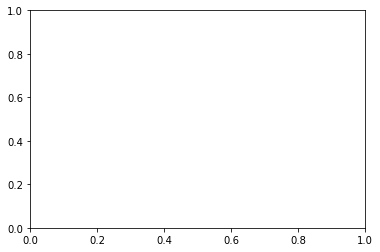

In [8]:
sheet_names = ["PS", "HM", "FT", "TT", "LA"] #["_PS_";"_HM_";"_FT_";"_TT_";"_LA_"]
sensor_names = ["Volt", "Volt.1", "Volt.2", "Volt.3", "Volt.4",	"Volt.5", "Volt.6", "Volt.7", "Volt.8",	"Volt.9", "Volt.10", "Volt.11"]
sensor_names_dict = {"Volt": "Right_1 X", "Volt.1":"Right_1 Y", "Volt.2":"Right_1 Z", "Volt.3":"Right_2 X", "Volt.4":"Right_2 Y",	"Volt.5":"Right_2 Z", "Volt.6":"Left_1 X", "Volt.7":"Left_1 Y", "Volt.8":"Left_1 Z",	"Volt.9":"Left_2 X", "Volt.10":"Left_2 Y", "Volt.11":"Left_2 Z"}
right_1 = ["Relative Time", "Volt", "Volt.1", "Volt.2"]
right_2 = ["Relative Time", "Volt.3", "Volt.4", "Volt.5"]
left_1  = ["Relative Time", "Volt.6", "Volt.7", "Volt.8", ]
left_2  = ["Relative Time", "Volt.9", "Volt.10", "Volt.11"]
right = [right_1, right_2]
left = [left_1, left_2]
#sensor_groups = [right, left]
#sensor_group_names = ["right_1", "right_2", "left_1", "left_2"]
sensor_groups = {"right_1": right_1, "right_2": right_2, "left_1": left_1, "left_2":left_2}


subject = []
task = []
sensor = []
start = []
stop = []

for name, sheet in data.items():
    for sheet_name in sheet_names:#list(sheet.keys()):
        for sensor_group_name, sensor_group in sensor_groups.items():
            try:
                #print(name)
                path = name.replace(".xlsx","")+"_"+sheet_name+"_"+sensor_group_name
                print("path: ", path)
                s = sheet[sheet_name][sensor_group]
                seqs = gen_series(s, path, rms_window=16)
                df = pd.DataFrame.from_dict(seqs, orient='index').transpose()
                df.to_csv("series_2s/"+path+".csv")

                #get start and stop times
                indices = np.argwhere(df["threshold"].to_numpy() == 1)
                start_time = float(df["relative_time"][indices[0]])
                stop_time = float(df["relative_time"][indices[-1]])
                subject.append(name.replace(".xlsx",""))
                task.append(sheet_name)
                sensor.append(sensor_group_name)
                start.append(start_time)
                stop.append(stop_time)

                #base graph
                plots = []
                for graph_sensor in sensor_group:
                    if graph_sensor != "Relative Time":
                        plot = plt.plot(sheet[sheet_name]["Relative Time"], sheet[sheet_name][graph_sensor], label = graph_sensor, alpha=.5)
                        plots.append(plot)

                plt.xlabel("Time")
                plt.ylabel("Volts")
                plt.title(path)
                plt.legend()
                plt.savefig("fixed_charts/" + path + ".png", dpi = 400, transparent = False)
                plt.close()
                
            except:
                continue


info = {"subject": subject, "task": task, "sensor": sensor, "start": start, "stop":stop}
times = pd.DataFrame(data = info)
times.to_csv("startstoptimes.csv")

In [23]:
print(path)
seqs = gen_series(s, path)


df = pd.DataFrame.from_dict(seqs, orient='index').transpose()
# for i, r in s.iterrows():
#     print(r[0])


PDMotion_0025_Retest_LA_left_2
5036


<Figure size 432x288 with 0 Axes>

In [50]:
#print(df["threshold"].where(1).last_valid_index())
s = df["threshold"].to_numpy()
indices = np.argwhere(df["threshold"].to_numpy() == 1)
first = float(df["relative_time"][indices[0]])
last = float(df["relative_time"][indices[-1]])
print(first,)


5.7875


In [60]:
data.keys()

dict_keys(['PDMotion_0020_Test.xlsx', 'PDMotion_0025_Retest.xlsx'])